# Configuration of Google Colab and Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/"Colab Notebooks"

/content/drive/MyDrive/Colab Notebooks


In [3]:
username = "IsaacOlguin"
repository =  "AutomatedTraumaDetectionInGCT"

In [4]:
%cd {repository}

/content/drive/MyDrive/Colab Notebooks/AutomatedTraumaDetectionInGCT


In [5]:
%ls -a

'01_Dataset analysis.ipynb'   data/   .git/   LICENSE   README.md


In [6]:
%pwd

'/content/drive/MyDrive/Colab Notebooks/AutomatedTraumaDetectionInGCT'

# Dataset Analysis

#### Installation of libraries

In [ ]:
#!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Import of libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('data/genocide-transcript-corpus-v0.1.csv', delimiter=';')
print("=> First five rows:")
print(df.head(5))

=> First five rows:
                                           paragraph  label  tribunal  \
0  ýý ý Kingdom of Cam bodia Nation Religion King...      0         1   
1  pag e Questioning by Mr Kar Savuth commenc es ...      0         1   
2  decision on the removal of witnesses from the ...      0         1   
3  The defence agreed with the Chambers proposal ...      0         1   
4  therefore be in a position to compare them wit...      0         1   

     witness                             document      case        date  
0  Vann Nath  E1_39.1_TR001_20090629_Final_EN_Pub  Case 001  29.06.2009  
1  Vann Nath  E1_39.1_TR001_20090629_Final_EN_Pub  Case 001  29.06.2009  
2  Vann Nath  E1_39.1_TR001_20090629_Final_EN_Pub  Case 001  29.06.2009  
3  Vann Nath  E1_39.1_TR001_20090629_Final_EN_Pub  Case 001  29.06.2009  
4  Vann Nath  E1_39.1_TR001_20090629_Final_EN_Pub  Case 001  29.06.2009  


In [9]:
df.loc[0]

paragraph    ýý ý Kingdom of Cam bodia Nation Religion King...
label                                                        0
tribunal                                                     1
witness                                              Vann Nath
document                   E1_39.1_TR001_20090629_Final_EN_Pub
case                                                  Case 001
date                                                29.06.2009
Name: 0, dtype: object

In [10]:
df.iloc[0:2]

,paragraph,label,tribunal,witness,document,case,date
0,ýý ý Kingdom of Cam bodia Nation Religion King...,0,1,Vann Nath,E1_39.1_TR001_20090629_Final_EN_Pub,Case 001,29.06.2009
1,pag e Questioning by Mr Kar Savuth commenc es ...,0,1,Vann Nath,E1_39.1_TR001_20090629_Final_EN_Pub,Case 001,29.06.2009


In [11]:
df.iloc[1000:1002]["witness"]

1000    Witness JJ
1001    Witness JJ
Name: witness, dtype: object

In [12]:
df["datetime"] = pd.to_datetime(df["date"], format="%d.%m.%Y")

In [13]:
df.iloc[0:2]

,paragraph,label,tribunal,witness,document,case,date,datetime
0,ýý ý Kingdom of Cam bodia Nation Religion King...,0,1,Vann Nath,E1_39.1_TR001_20090629_Final_EN_Pub,Case 001,29.06.2009,2009-06-29
1,pag e Questioning by Mr Kar Savuth commenc es ...,0,1,Vann Nath,E1_39.1_TR001_20090629_Final_EN_Pub,Case 001,29.06.2009,2009-06-29


In [14]:
# Number and list of witnesses (Implications of information public)

df_witness = df["witness"].drop_duplicates(keep="first")
print(df_witness)
print(f"\n\t\tNumber of witnesses: {df_witness.count()}")

0               Vann Nath
114              Chum Mey
214           Bay Sophany
266         Seoun Sovandy
308          Seng Sivutha
337           2-TCCP-1063
403              Sin Oeng
465             Isak Gasi
529          Fadil Redzic
562        Ibro Osmanovic
596           Edin Mrkalj
654     Hasiba Harambasic
700           Suada Ramic
707         Shefqet Zogaj
745            Osman Kuci
773         Hadije Fazliu
798          Sadik Januzi
815           Ndrec Konaj
840        Edison Zatriqi
877         Mahmut Halimi
916      Aferdita Hajrizi
939           Mehmet Aliu
995            Witness JJ
1097           Witness KK
1174           Witness NN
1283          Witness QAL
1322           Witness EV
Name: witness, dtype: object

		Number of witnesses: 27


In [15]:
# Total number of tribunals

df_tribunals = df["tribunal"].drop_duplicates(keep="first")
print(df_tribunals)
print(f"\n\t\tNumber of tribunals: {df_tribunals.count()}")

0      1
465    2
995    3
Name: tribunal, dtype: int64

		Number of tribunals: 3


In [16]:
# Total number of documents

df_documents = df["document"].drop_duplicates(keep="first")
print(df_documents)
print(f"\n\t\tNumber of documents: {df_documents.count()}")

0        E1_39.1_TR001_20090629_Final_EN_Pub
114      E1_40.1_TR001_20090630_Final_EN_Pub
214     E1_200.1_TR002_20130604_Final_EN_Pub
337     E1_505.1_TR002_20161201_Final_EN_Pub
465                                 960515IT
596                                 960718IT
707                                 020424IT
815                                 020425IT
916                                 020426IT
995                              TRA000026/1
1072                             TRA000027/1
1097                             TRA000030/1
1174                             TRA000034/1
1283                             TRA002354/2
1345                             TRA002353/2
1454                             TRA002352/1
Name: document, dtype: object

		Number of documents: 16


In [17]:
# Total number of cases

df_cases = df["case"].drop_duplicates(keep="first")
print(df_cases)
print(f"\n\t\tNumber of cases: {df_cases.count()}")

0         Case 001
214     Case 002-1
337     Case 002-2
465      IT-94-1-T
707       IT-02-54
995     ICTR-96-04
1283    ICTR-98-42
Name: case, dtype: object

		Number of cases: 7


In [18]:
df[df["tribunal"] == 1] # Paragraphs per tribunal

,paragraph,label,tribunal,witness,document,case,date,datetime
0,ýý ý Kingdom of Cam bodia Nation Religion King...,0,1,Vann Nath,E1_39.1_TR001_20090629_Final_EN_Pub,Case 001,29.06.2009,2009-06-29
1,pag e Questioning by Mr Kar Savuth commenc es ...,0,1,Vann Nath,E1_39.1_TR001_20090629_Final_EN_Pub,Case 001,29.06.2009,2009-06-29
2,decision on the removal of witnesses from the ...,0,1,Vann Nath,E1_39.1_TR001_20090629_Final_EN_Pub,Case 001,29.06.2009,2009-06-29
3,The defence agreed with the Chambers proposal ...,0,1,Vann Nath,E1_39.1_TR001_20090629_Final_EN_Pub,Case 001,29.06.2009,2009-06-29
4,therefore be in a position to compare them wit...,0,1,Vann Nath,E1_39.1_TR001_20090629_Final_EN_Pub,Case 001,29.06.2009,2009-06-29
...,...,...,...,...,...,...,...,...
460,you heard from someone else Can you tell us pl...,0,1,Sin Oeng,E1_505.1_TR002_20161201_Final_EN_Pub,Case 002-2,01.12.2016,2016-12-01
461,than and greater than signs has been correct...,0,1,Sin Oeng,E1_505.1_TR002_20161201_Final_EN_Pub,Case 002-2,01.12.2016,2016-12-01
462,you know how Heng Samrin implemented that orde...,0,1,Sin Oeng,E1_505.1_TR002_20161201_Final_EN_Pub,Case 002-2,01.12.2016,2016-12-01
463,Mr President if you would allow me please Q Mr...,0,1,Sin Oeng,E1_505.1_TR002_20161201_Final_EN_Pub,Case 002-2,01.12.2016,2016-12-01


In [19]:

array_labels = df["label"].unique() # Returns an array
array_tribunals = df["tribunal"].unique()
array_documents = df["document"].unique()
array_cases = df["case"].unique()
array_date = df["datetime"].unique()

print(f"This is the array of labels with {len(array_labels)} elements\n{array_labels}\n\n")
print(f"This is the array of tribunals with {len(array_tribunals)} elements\n{array_tribunals}\n\n")
print(f"This is the array of documents with {len(array_documents)} elements\n{array_documents}\n\n")
print(f"This is the array of cases with {len(array_cases)} elements\n{array_cases}\n\n")
print(f"This is the array of dates with {len(array_date)} elements\n{array_date}\n\n")

This is the array of labels with 2 elements
[0 1]


This is the array of tribunals with 3 elements
[1 2 3]


This is the array of documents with 16 elements
['E1_39.1_TR001_20090629_Final_EN_Pub'
 'E1_40.1_TR001_20090630_Final_EN_Pub'
 'E1_200.1_TR002_20130604_Final_EN_Pub'
 'E1_505.1_TR002_20161201_Final_EN_Pub' '960515IT' '960718IT' '020424IT'
 '020425IT' '020426IT' 'TRA000026/1' 'TRA000027/1' 'TRA000030/1'
 'TRA000034/1' 'TRA002354/2' 'TRA002353/2' 'TRA002352/1']


This is the array of cases with 7 elements
['Case 001' 'Case 002-1' 'Case 002-2' 'IT-94-1-T' 'IT-02-54' 'ICTR-96-04'
 'ICTR-98-42']


This is the array of dates with 16 elements
['2009-06-29T00:00:00.000000000' '2009-06-30T00:00:00.000000000'
 '2013-06-04T00:00:00.000000000' '2016-12-01T00:00:00.000000000'
 '1996-05-15T00:00:00.000000000' '1996-07-18T00:00:00.000000000'
 '2002-04-24T00:00:00.000000000' '2002-04-25T00:00:00.000000000'
 '2002-04-26T00:00:00.000000000' '1997-10-23T00:00:00.000000000'
 '1997-10-24T00:00:00.00

In [76]:
dict_info_tribunals = {}

##### Get cases per tribunal

In [77]:
print("="*40)
for tribunal_id in array_tribunals:

  print(f"Tribunal {tribunal_id}")

  cases_per_tribunal = df[df["tribunal"] == tribunal_id]
  num_paragraphs_tribunal = cases_per_tribunal["paragraph"].count()
  
  cases_per_tribunal = cases_per_tribunal["case"].unique()
  print(f"\tNum of cases: {len(cases_per_tribunal)} with IDs [{cases_per_tribunal}]")

  witnesses_per_tribunal = df.loc[df["tribunal"] == tribunal_id]["witness"].unique()
  print(f"\tNum of witnesses: {len(witnesses_per_tribunal)} with IDs [{witnesses_per_tribunal}]")

  docs_per_tribunal = df.loc[df["tribunal"] == tribunal_id]["document"].unique()
  print(f"\tNum of docs: {len(docs_per_tribunal)} with IDs [{docs_per_tribunal}]")

  dict_info_tribunals[tribunal_id] = {
      "cases" : cases_per_tribunal,
      "witnesses" : witnesses_per_tribunal,
      "documents" : docs_per_tribunal,
      "num_paragraphs" : num_paragraphs_tribunal
  }

  print(f"\tNum paragraphs (tribunal {tribunal_id}) {num_paragraphs_tribunal}")
  for label_id in array_labels:
    num_paragraphs_per_label = len((df.loc[(df["tribunal"] == tribunal_id) & (df["label"]== label_id)]).index)
    print(f"\t\tNum of paragraphs marked as {label_id}: {num_paragraphs_per_label}")
    dict_info_tribunals[tribunal_id]["label_" + str(label_id)] = num_paragraphs_per_label

  print("="*40)

Tribunal 1
	Num of cases: 3 with IDs [['Case 001' 'Case 002-1' 'Case 002-2']]
	Num of witnesses: 7 with IDs [['Vann Nath' 'Chum Mey' 'Bay Sophany' 'Seoun Sovandy' 'Seng Sivutha'
 '2-TCCP-1063' 'Sin Oeng']]
	Num of docs: 4 with IDs [['E1_39.1_TR001_20090629_Final_EN_Pub'
 'E1_40.1_TR001_20090630_Final_EN_Pub'
 'E1_200.1_TR002_20130604_Final_EN_Pub'
 'E1_505.1_TR002_20161201_Final_EN_Pub']]
	Num paragraphs (tribunal 1) 465
		Num of paragraphs marked as 0: 286
		Num of paragraphs marked as 1: 179
Tribunal 2
	Num of cases: 2 with IDs [['IT-94-1-T' 'IT-02-54']]
	Num of witnesses: 15 with IDs [['Isak Gasi' 'Fadil Redzic' 'Ibro Osmanovic' 'Edin Mrkalj'
 'Hasiba Harambasic' 'Suada Ramic' 'Shefqet Zogaj' 'Osman Kuci'
 'Hadije Fazliu' 'Sadik Januzi' 'Ndrec Konaj' 'Edison Zatriqi'
 'Mahmut Halimi' 'Aferdita Hajrizi' 'Mehmet Aliu']]
	Num of docs: 5 with IDs [['960515IT' '960718IT' '020424IT' '020425IT' '020426IT']]
	Num paragraphs (tribunal 2) 530
		Num of paragraphs marked as 0: 401
		Num of para

In [78]:
dict_info_tribunals

{1: {'cases': array(['Case 001', 'Case 002-1', 'Case 002-2'], dtype=object),
  'witnesses': array(['Vann Nath', 'Chum Mey', 'Bay Sophany', 'Seoun Sovandy',
         'Seng Sivutha', '2-TCCP-1063', 'Sin Oeng'], dtype=object),
  'documents': array(['E1_39.1_TR001_20090629_Final_EN_Pub',
         'E1_40.1_TR001_20090630_Final_EN_Pub',
         'E1_200.1_TR002_20130604_Final_EN_Pub',
         'E1_505.1_TR002_20161201_Final_EN_Pub'], dtype=object),
  'num_paragraphs': 465,
  'label_0': 286,
  'label_1': 179},
 2: {'cases': array(['IT-94-1-T', 'IT-02-54'], dtype=object),
  'witnesses': array(['Isak Gasi', 'Fadil Redzic', 'Ibro Osmanovic', 'Edin Mrkalj',
         'Hasiba Harambasic', 'Suada Ramic', 'Shefqet Zogaj', 'Osman Kuci',
         'Hadije Fazliu', 'Sadik Januzi', 'Ndrec Konaj', 'Edison Zatriqi',
         'Mahmut Halimi', 'Aferdita Hajrizi', 'Mehmet Aliu'], dtype=object),
  'documents': array(['960515IT', '960718IT', '020424IT', '020425IT', '020426IT'],
        dtype=object),
  'num_para

### Plotting results

##### Num cases per tribunal

Tribunal 'Tribunal_1' with '3' cases
Tribunal 'Tribunal_2' with '2' cases
Tribunal 'Tribunal_3' with '2' cases


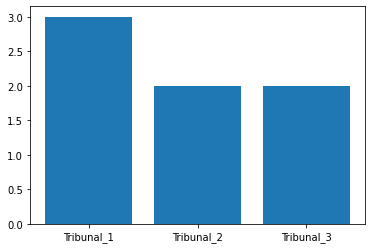

In [107]:
list_values = [len(dict_info_tribunals[id_tribunal]["cases"]) for id_tribunal in sorted(array_tribunals)]
list_labels = ["Tribunal_" + str(id_tribunal) for id_tribunal in sorted(array_tribunals)]
x_axis = np.arange(len(list_values))
for tribunal, num_cases in zip(list_labels, list_values):
  print(f"Tribunal '{tribunal}' with '{num_cases}' cases")

plt.bar(x_axis, height=list_values)
plt.xticks(x_axis, list_labels);

plt.show()

##### Num witnesses per tribunal

Tribunal 'Tribunal_1' with '7' witnesses
Tribunal 'Tribunal_2' with '15' witnesses
Tribunal 'Tribunal_3' with '5' witnesses


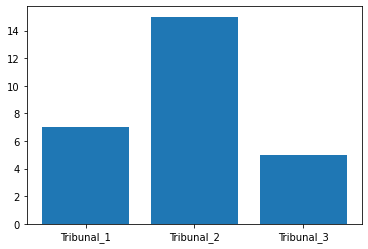

In [108]:
list_values = [len(dict_info_tribunals[id_tribunal]["witnesses"]) for id_tribunal in sorted(array_tribunals)]
list_labels = ["Tribunal_" + str(id_tribunal) for id_tribunal in sorted(array_tribunals)]
x_axis = np.arange(len(list_values))
for tribunal, num_witnesses in zip(list_labels, list_values):
  print(f"Tribunal '{tribunal}' with '{num_witnesses}' witnesses")

plt.bar(x_axis, height=list_values)
plt.xticks(x_axis, list_labels);

plt.show()

##### Number of paragraphs per tribunal

[465, 530, 480]
[286, 401, 259]
[179, 129, 221]
3


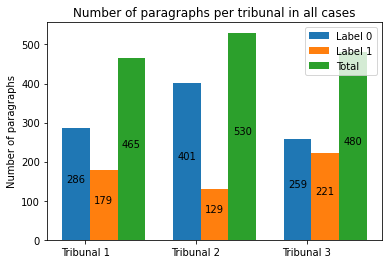

In [197]:
N = len(array_tribunals)
total_num_paragraphs = [dict_info_tribunals[id_tribunal]["num_paragraphs"] for id_tribunal in sorted(array_tribunals)]
num_paragraphs_label_0 = [dict_info_tribunals[id_tribunal]["label_0"] for id_tribunal in sorted(array_tribunals)]
num_paragraphs_label_1 = [dict_info_tribunals[id_tribunal]["label_1"] for id_tribunal in sorted(array_tribunals)]

print(total_num_paragraphs)
print(num_paragraphs_label_0)
print(num_paragraphs_label_1)
print(N)

tribunals = [ ("Tribunal " + str(elem)) for elem in array_tribunals]
classif_paragraphs = ['Label 0', 'Label 1', 'Total']

ind = np.arange(N)  # the x locations for the groups
width = 0.25       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot()
rects1 = ax.bar(ind, num_paragraphs_label_0, width)
rects2 = ax.bar(ind+width, num_paragraphs_label_1, width)
rects3 = ax.bar(ind+2*width, total_num_paragraphs, width)

rects_gral = [rects1[0], rects2[0], rects3[0]]

# add some
ax.set_ylabel('Number of paragraphs')
ax.set_title('Number of paragraphs per tribunal in all cases')
ax.set_xticks(ind + width / 3)
ax.set_xticklabels( tribunals )

ax.legend( (rects1, rects2, rects3) , classif_paragraphs )

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., .5*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()

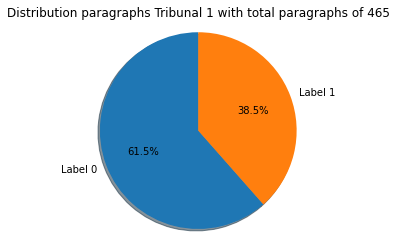

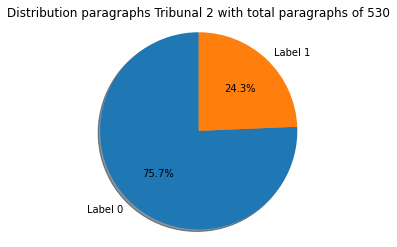

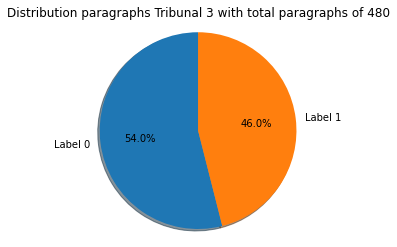

In [205]:
for tribunal_id, total_num_paragraph_per_tribunal, num_par_label_0, num_par_label_1 in zip(sorted(array_tribunals), total_num_paragraphs, num_paragraphs_label_0, num_paragraphs_label_1):
  labels = 'Label 0', 'Label 1'
  sizes = [num_par_label_0, num_par_label_1]
  explode = (0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs') = 0.1

  fig1, ax1 = plt.subplots()
  ax1.set_title(f'Distribution paragraphs Tribunal {tribunal_id} with total paragraphs of {total_num_paragraph_per_tribunal}')
  ax1.pie(sizes, explode=explode, labels=labels, autopct='%2.1f%%', shadow=True, startangle=90) #'%1.1f%%'
  ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

  plt.show()